# **Clustering Hiérarchique**
 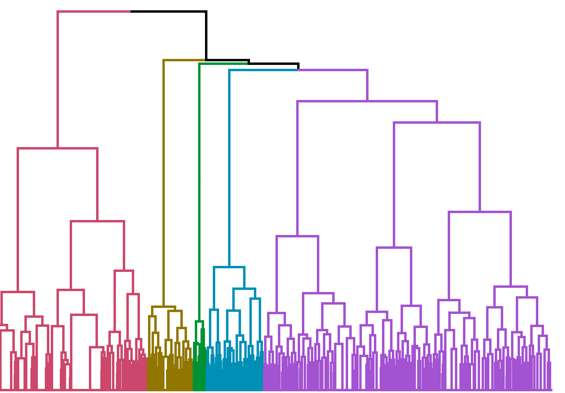

#  Classification Hiérarchique - Agglomérative

Nous allons étudier une technique de clustering appelée <b>Classification Hiérarchique Agglomérative</b>. Rappelons que l’approche agglomérative suit une logique ascendante (bottom-up). <br><br>
Dans ce TP, nous nous concentrerons sur la classification agglomérative, qui est plus couramment utilisée que la classification divisive. <br><br>
Nous utiliserons également le critère de liaison <b>complète</b> (<i>Complete Linkage</i>) pour mesurer les distances entre groupes. <br>
<b><i>REMARQUE : Vous pouvez également tester le critère de liaison moyenne (<i>Average Linkage</i>) à la place du lien complet afin de comparer les résultats !</i></b>


In [ ]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
%matplotlib inline

### I. Génération de données aléatoires

Nous allons générer un ensemble de données à l’aide de la classe <b>make_blobs</b>. <br><br>

 1)  Utilisez les paramètres suivants pour <b>make_blobs</b> :
<ul>
    <li><b>n_samples</b> : Nombre total de points à générer, répartis équitablement entre les clusters.</li>
    <ul>
        <li>Choisissez une valeur entre 10 et 1500</li>
    </ul>
    <li><b>centers</b> : Nombre de centres à créer, ou coordonnées fixes des centres.</li>
    <ul>
        <li>Utilisez des coordonnées x, y pour définir les centres (entre 1 et 10).<br>
        Exemple : centers = [[1, 1], [2, 5]]</li>
    </ul>
    <li><b>cluster_std</b> : Écart-type des clusters. Plus la valeur est grande, plus les clusters seront dispersés.</li>
    <ul>
        <li>Choisissez une valeur entre 0.5 et 1.5</li>
    </ul>
</ul> <br>

Enregistrez le résultat dans les variables <b>X1</b> et <b>y1</b>.


In [ ]:
X1, y1 = make_blobs(n_samples=500, centers=[[2, 2], [8, 8]], cluster_std=1.0)

In [ ]:
print(X1)

[[ 9.12960485e+00  7.30252857e+00]
 [ 8.02203331e+00  6.88715883e+00]
 [ 8.63855863e+00  8.16865597e+00]
 [ 2.64752051e+00  1.96152134e+00]
 [ 8.40007151e+00  7.31313572e+00]
 [ 7.04308856e+00  8.00971453e+00]
 [ 7.85898408e+00  7.71809210e+00]
 [ 6.67814373e+00  8.89629856e+00]
 [ 8.46306953e+00  7.54323233e+00]
 [ 7.43586878e-01  2.68526403e+00]
 [ 1.74887710e+00  1.20606913e+00]
 [ 1.02423169e+00  1.95018011e+00]
 [ 2.72789357e+00 -7.01255084e-03]
 [ 9.54901547e+00  7.05144541e+00]
 [ 8.17937488e-01  3.62909607e+00]
 [ 2.85110887e+00  9.59800153e-01]
 [ 8.17143857e+00  9.07421571e+00]
 [ 7.62425046e+00  6.69940369e+00]
 [ 8.11987452e+00  8.25526503e+00]
 [ 3.72024192e+00  3.43873785e+00]
 [ 1.51268546e+00  1.92448642e+00]
 [ 7.37518557e+00  7.92885751e+00]
 [ 9.28724525e-01  3.19799092e+00]
 [ 2.05689362e+00  1.88074145e+00]
 [ 1.84766989e+00  3.20249727e+00]
 [ 9.19669985e+00  7.06396417e+00]
 [ 1.56474542e+00  2.42771015e+00]
 [ 8.07287505e+00  7.93614459e+00]
 [ 1.37861393e+00  3

In [ ]:
print(y1)

[1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1
 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0
 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1
 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0
 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1
 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0
 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1
 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0
 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 1
 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1
 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0
 1 1 1 1 1 1 1 1 0 1 0 1 

**2) Plot the scatter plot of the randomly generated data**

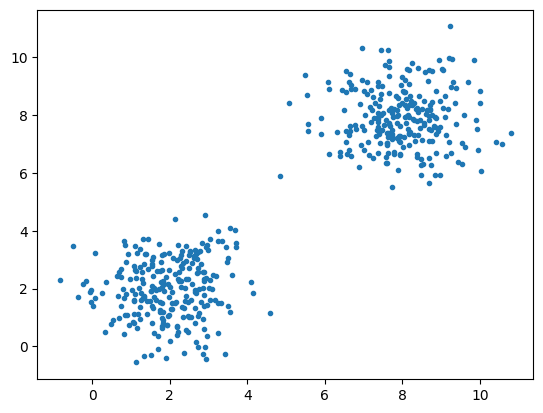

In [ ]:
plt.scatter(X1[:, 0], X1[:, 1], marker='.')

### II. Clustering Agglomératif

1) Nous allons commencer par appliquer la classification agglomérative sur les points de données aléatoires que nous venons de générer.


La classe <b>Agglomerative Clustering</b> nécessite deux paramètres principaux :
<ul>
    <li><b>n_clusters</b> : Nombre de clusters à former, correspondant aussi au nombre de centroïdes à générer.</li>
    <ul>
        <li>Valeur à utiliser : 4</li>
    </ul>
    <li><b>linkage</b> : Critère de liaison à utiliser. Ce critère détermine la manière dont la distance est mesurée entre deux ensembles d'observations. L'algorithme fusionnera les paires de clusters qui minimisent ce critère.</li>
    <ul>
        <li>Valeur à utiliser : 'complete'</li>
        <li><b>Remarque</b> : Il est recommandé d’essayer également avec la valeur 'average' pour comparer les résultats</li>
    </ul>
</ul> <br>
Stockez le résultat dans une variable appelée <b>agglom</b>.


In [ ]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')

2) Ajustez(fit) le modèle en utilisant les données générées précédemment, à savoir <b>X2</b> et <b>y2</b>.


In [ ]:
X2, Y2 = make_blobs(n_samples=500, centers=[[2, 2], [8, 8]], cluster_std=1.0)
agglom.fit(X2, Y2)

AgglomerativeClustering(linkage='complete', n_clusters=4)

3) Exécutez le code suivant pour afficher le résultat du clustering ! <br>
N'oubliez pas de lire le code et les commentaires pour mieux comprendre le fonctionnement de l'affichage graphique.


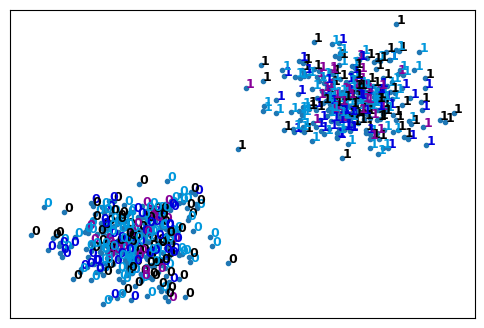

In [ ]:
# Crée une figure de dimensions 6 pouces par 4 pouces.
plt.figure(figsize=(6,4))

# Ces deux lignes servent à réduire l’échelle des points de données,
# sinon les points seraient très éloignés les uns des autres.

# Définir les bornes minimale et maximale de X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Calcule la version normalisée de X1 à partir des bornes.
X1 = (X1 - x_min) / (x_max - x_min)

# Cette boucle affiche tous les points de données.
for i in range(X1.shape[0]):
    # Affiche chaque point avec sa valeur de cluster correspondante
    # (ex. 0), et applique une couleur selon une carte de couleurs (plt.cm.nipy_spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

# Supprimer les graduations des axes x et y
plt.xticks([])
plt.yticks([])
#plt.axis('off')  # (optionnel) supprime aussi les axes eux-mêmes

# Affiche les points de données originaux avant le clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')

# Affiche le graphique
plt.show()


### Dendrogramme associé à la Classification Hiérarchique Agglomérative

Rappel : une <b>matrice de distances</b> contient la <b>distance entre chaque point et tous les autres points d’un jeu de données</b>. <br>
4) Utilisez la fonction <b>distance_matrix ()</b>, qui nécessite <b>deux entrées</b>. Utilisez la matrice des caractéristiques <b>X1</b> comme première et deuxième entrée, et enregistrez la matrice de distances dans une variable appelée <b>dist_matrix</b>. <br><br>
Rappel : la matrice des distances est symétrique, avec une diagonale de zéros. C’est un bon moyen de vérifier que votre matrice est correcte. <br> (Affichez <b>dist_matrix</b> pour en vérifier le contenu)


In [ ]:
X1 = (X1 - x_min) / (x_max - x_min)
dist_matrix = distance_matrix(X1,X1)
print(dist_matrix)

[[0.         0.00875116 0.00737427 ... 0.00200982 0.0603455  0.05032123]
 [0.00875116 0.         0.01053383 ... 0.00700262 0.05261092 0.04158769]
 [0.00737427 0.01053383 0.         ... 0.00643465 0.0628941  0.05014039]
 ...
 [0.00200982 0.00700262 0.00643465 ... 0.         0.05912923 0.04858063]
 [0.0603455  0.05261092 0.0628941  ... 0.05912923 0.         0.02378803]
 [0.05032123 0.04158769 0.05014039 ... 0.04858063 0.02378803 0.        ]]


5) En utilisant la classe <b>linkage</b> du module <b>hierarchy</b>, fournissez les paramètres suivants :
<ul>
    <li>La matrice de distances</li>
    <li><b>'complete'</b> pour utiliser le critère de liaison complète</li>
</ul> <br>
Enregistrez le résultat dans une variable appelée <b>Z</b>.


In [ ]:
Z = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-18-3814b774a052>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


Un clustering hiérarchique est généralement représenté sous forme de dendrogramme. Chaque fusion est représentée par une ligne horizontale. L’ordonnée (valeur en y) de cette ligne correspond à la similarité (ou distance) entre les deux clusters fusionnés, où chaque point de départ est considéré comme un cluster individuel.

En remontant du bas vers le nœud supérieur, le dendrogramme permet de reconstruire l’historique des fusions ayant abouti au regroupement final représenté.

6) </b> En utilisant la classe <b>dendrogram</b> du module <b>hierarchy</b>, affichez le dendrogramme correspondant à la matrice <b>Z</b> générée précédemment. <br>
Enregistrez le résultat dans une variable appelée <b>dendro</b>. <br><br>

<b>Remarque :</b> Par défaut, l’option <b>color_threshold</b> est fixée à 70% de la hauteur maximale du dendrogramme. <br>
Cela permet de colorer automatiquement les branches pour visualiser les clusters. Vous pouvez ajuster ce seuil pour observer des partitions différentes.



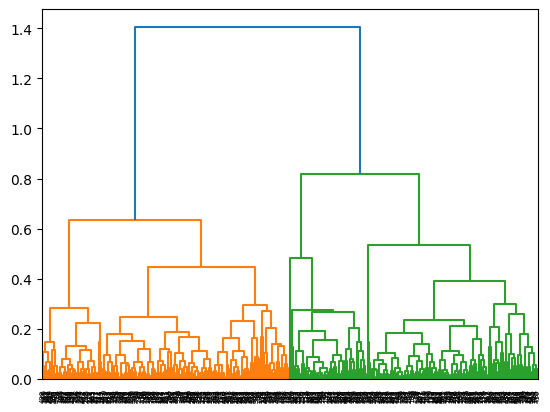

In [ ]:
plt = hierarchy.dendrogram(Z)


7)Changez-le  critère <b>complete</b> en <b>average</b> et observez comment le dendrogramme résultant évolue. <br>


<ipython-input-21-16b8ff3e600f>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = hierarchy.linkage(dist_matrix, 'average')


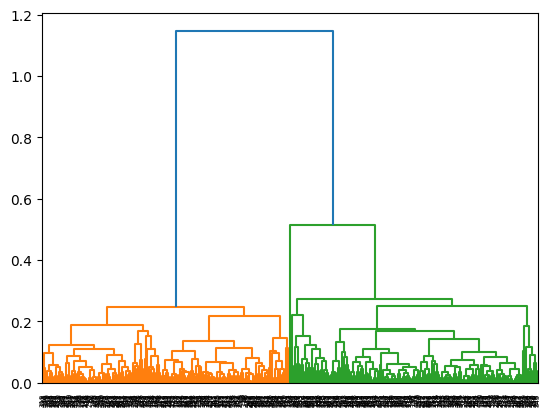

In [ ]:
z = hierarchy.linkage(dist_matrix, 'average')
plt = hierarchy.dendrogram(z)

8) Que remarquez-vous par rapport au dendrogramme obtenu précédemment ?

Double-cliquez __ici__ pour écrire votre solution.



# III. Clustering sur une base de données de véhicules

Imaginons qu’un constructeur automobile ait développé des prototypes pour un nouveau modèle de véhicule. Avant de le commercialiser, il souhaite identifier les véhicules existants sur le marché qui lui ressemblent le plus. En d'autres termes, il veut savoir comment les véhicules peuvent être regroupés, quels groupes sont les plus proches du prototype, et donc quels seront ses concurrents directs.

Notre objectif ici est d’utiliser des méthodes de clustering pour détecter les regroupements les plus représentatifs de véhicules. Cela permettra de résumer les modèles existants et d’aider le constructeur à prendre des décisions éclairées concernant le positionnement du nouveau modèle.


# Lecture de la BD
**1) Charger la BD 'Data.csv'**
Commençons par lire le jeu de données afin d’examiner les caractéristiques que le constructeur a collectées sur les modèles existants.


In [ ]:
data=pd.read_csv('/content/Data (1).csv')
data


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Volvo,V70,17.531,$null$,0.000,28.800,2.400,168.000,104.900,69.300,186.200,3.259,17.900,25.000,2.864,0.0
155,Volvo,C70,3.493,$null$,0.000,45.500,2.300,236.000,104.900,71.500,185.700,3.601,18.500,23.000,1.251,0.0
156,Volvo,S80,18.969,$null$,0.000,36.000,2.900,201.000,109.900,72.100,189.800,3.600,21.100,24.000,2.943,0.0
157,NaN,newCar,$null$,$null$,$null$,21.500,1.500,76.000,106.300,67.900,175.000,2.932,11.900,46.000,$null$,1.0



Le jeu de données contient les caractéristiques suivantes : prix en milliers (price), taille du moteur (engine_s), puissance en chevaux (horsepow), empattement (wheelbas), largeur (width), longueur (length), poids à vide (curb_wgt), capacité du réservoir (fuel_cap) et efficacité énergétique (mpg).


# Nettoyage
2) Supprimer les lignes contenant des valeurs manquantes.  
**texte en gras**

In [ ]:
print ("Shape of dataset before cleaning: ", data.size)
data[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = data[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
data = data.dropna()
data = data.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", data.size)
data.head(5)

Shape of dataset before cleaning:  2544
Shape of dataset after cleaning:  1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


### Sélection des caractéristiques
3) À partir du DataFrame, sélectionnez les variables quantitatives pertinentes à utiliser pour le clustering. <br>
Créez un nouveau DataFrame appelé <b>featureset</b> contenant uniquement les colonnes suivantes :
<ul>
  <li>'engine_s'</li>
  <li>'horsepow'</li>
  <li>'wheelbas'</li>
  <li>'width'</li>
  <li>'length'</li>
  <li>'curb_wgt'</li>
  <li>'fuel_cap'</li>
  <li>'mpg'</li>
</ul>

In [ ]:
featureset = data[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

### Normalisation
4) Appliquez une normalisation sur l’ensemble des variables sélectionnées en utilisant le transformateur <b>MinMaxScaler</b>. <br> Créez un nouveau DataFrame contenant les variables normalisées.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

## Clustering en utilisant Scipy
5) Effectuez un clustering à l’aide du module <b>Scipy</b>. <br>
Commencez par calculer la matrice de distances à partir des données normalisées en utilisant la fonction distance_matrix() de la bibliothèque Scipy.

In [ ]:
from scipy.spatial import distance_matrix

D = distance_matrix(feature_mtx, feature_mtx)
D

array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

Dans la classification agglomérative, à chaque itération, l’algorithme met à jour la matrice de distances pour refléter la distance entre le nouveau cluster formé et les autres clusters restants.

Scipy prend en charge plusieurs méthodes pour calculer cette distance inter-clusters :
<ul>
    <li>single (lien simple)</li>
    <li>complete (lien complet)</li>
    <li>average (lien moyen)</li>
    <li>weighted (lien pondéré)</li>
    <li>centroid (centre de gravité)</li>
</ul>

6) Appliquez la méthode <b>complete</b>. Vous pouvez la remplacer par une autre (par exemple <i>average</i>) pour observer les différences dans les résultats.

In [ ]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

<ipython-input-27-8655000d21de>:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


7)Utilisez la fonction <b>fcluster</b> du module <b>scipy.cluster.hierarchy</b> pour transformer le dendrogramme en une partition de clusters disjoints. <br>
Fixez un seuil de distance <b>max_d</b> à 3 et utilisez le critère <b>'distance'</b> pour découper l’arbre hiérarchique. <br>
Stockez les étiquettes de clusters dans une variable nommée <b>clusters</b>. <br>
Affichez ensuite le tableau des affectations.


In [ ]:
from scipy.cluster.hierarchy import fcluster
max_d = 5
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

8) Utilisez à nouveau la fonction <b>fcluster</b> pour former des clusters à partir de la matrice <b>Z</b>, mais cette fois en fixant directement le <b>nombre de clusters</b> souhaité à <b>k = 3</b>. <br>
Utilisez le critère <b>'maxclust'</b> pour contraindre le découpage à ce nombre précis de groupes. <br>
Stockez les étiquettes obtenues dans la variable <b>clusters</b> et affichez le résultat.


In [ ]:
from scipy.cluster.hierarchy import fcluster
k = 3
clusters = fcluster(Z, k, criterion='maxclust')
clusters


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1], dtype=int32)

9) Afficher le dendrogramme correspendant en utilisant la fonction dendrogram() de la bibliothèque scipy.  
PS: utilisez l'option : leaf_label_func=llf, où llf = def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )

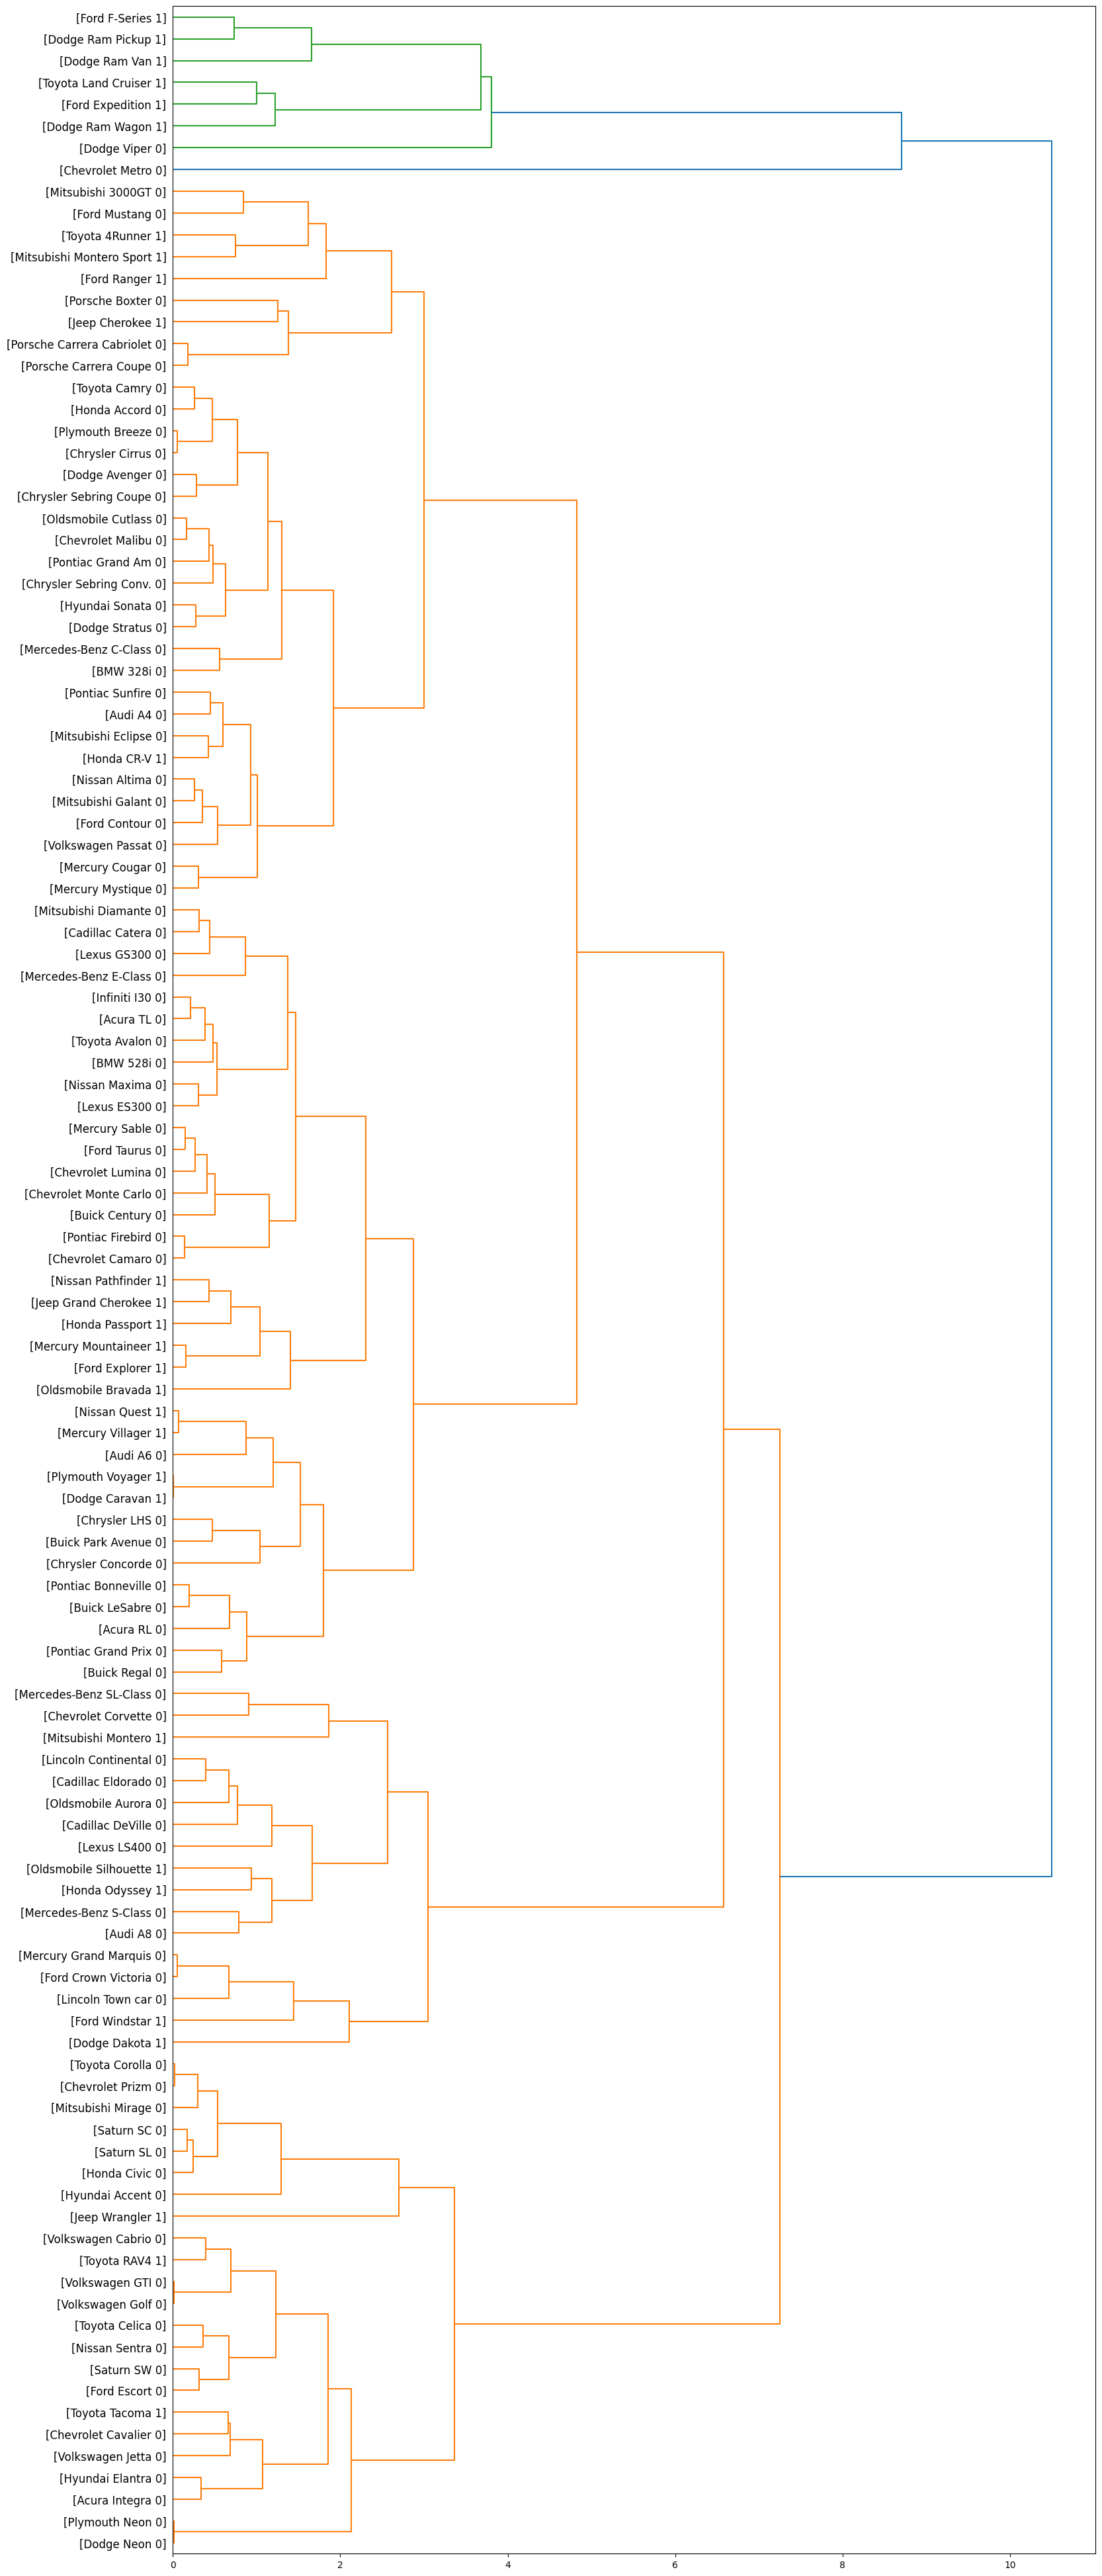

In [ ]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (data['manufact'][id], data['model'][id], int(float(data['type'][id])) )

dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')



## IV. Clustering avec scikit-learn

Reprenons l’opération, mais cette fois en utilisant le module <b>scikit-learn</b>.


**1) Calculez la matrice de distance**

In [ ]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx)
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


2) Nous allons maintenant utiliser la fonction <b>AgglomerativeClustering</b> de la bibliothèque <b>scikit-learn</b> pour appliquer la classification hiérarchique sur notre jeu de données.

La classe <b>AgglomerativeClustering</b> effectue un regroupement hiérarchique en suivant une approche ascendante (bottom-up). Le critère de liaison (<i>linkage</i>) est envoyé à 'complete'.


In [ ]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1])

3) Ajoutez une nouvelle colonne **'cluster_'** au DataFrame pour afficher le cluster auquel appartient chaque ligne.

> *Ajouter une citation*



In [ ]:
data['cluster_'] = agglom.labels_
data.head()


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,1
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


<ipython-input-35-69b06e89ba9b>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

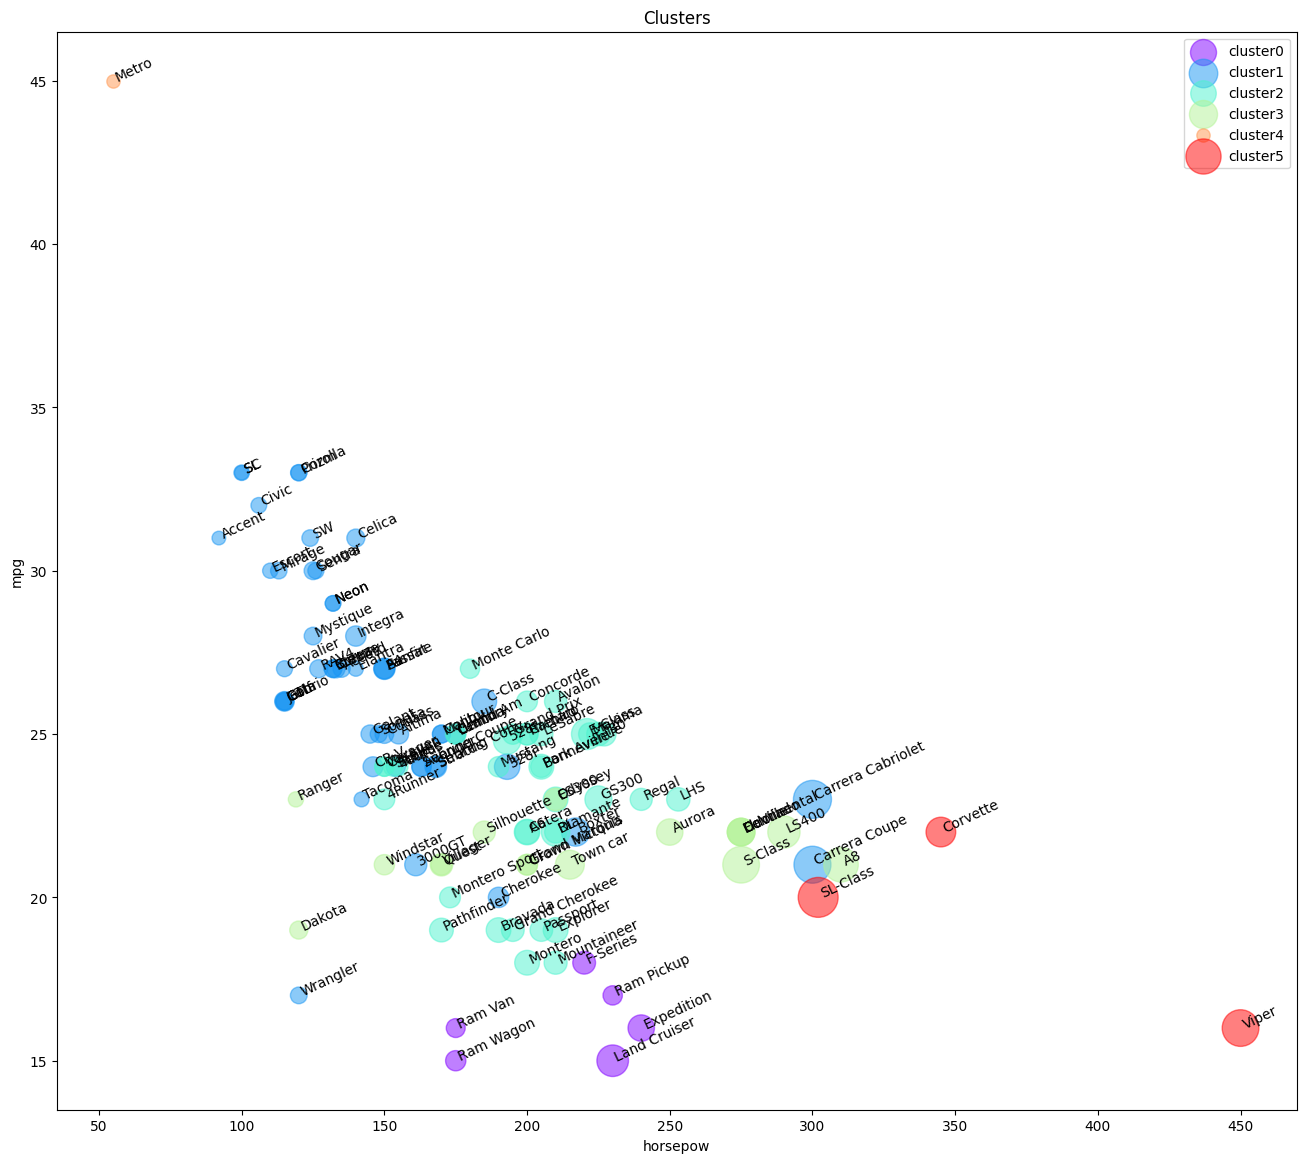

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = data[data.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Comme vous pouvez le constater, le nuage de points nous permet de visualiser la répartition des clusters. Toutefois, il n’est pas évident de localiser précisément le centroïde de chaque cluster.

Par ailleurs, notre jeu de données contient deux types de véhicules : les "truck" et les "car", identifiés dans la colonne <b>type</b> (où la valeur 1 indique l'appartenance à la catégorie). Nous allons utiliser cette information pour mieux distinguer les classes et interpréter les clusters.



4) Utilisez la méthode <b>groupby()</b> sur les colonnes <b>'cluster_'</b> et <b>'type'</b> pour compter le nombre d’observations de chaque type de véhicule (car ou truck) dans chaque cluster. <br>
Cela vous permettra de mieux comprendre la composition interne de chaque groupe formé par le clustering.

In [ ]:
data.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         1.0      6
1         0.0     47
          1.0      5
2         0.0     27
          1.0     11
3         0.0     10
          1.0      7
4         0.0      1
5         0.0      3
Name: cluster_, dtype: int64

5) Calculez les moyennes des principales caractéristiques (<b>horsepow</b>, <b>engine_s</b>, <b>mpg</b>, <b>price</b>) pour chaque combinaison de <b>cluster</b> et de <b>type</b> de véhicule. <br> Pour cela, utilisez <b>groupby()</b> suivi de <b>mean()</b>. <br> Cette étape permet de mieux comprendre les propriétés typiques des véhicules regroupés dans chaque cluster.

In [ ]:
agg_cars = data.groupby(['cluster_','type'])[['horsepow','engine_s','mpg','price']].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   145.000000  2.580000  22.200000  17.009200
2        0.0   203.111111  3.303704  24.214815  27.750593
         1.0   182.090909  3.345455  20.181818  26.265364
3        0.0   256.500000  4.410000  21.500000  42.870400
         1.0   160.571429  3.071429  21.428571  21.527714
4        0.0    55.000000  1.000000  45.000000   9.235000
5        0.0   365.666667  6.233333  19.333333  66.010000

On observe clairement que la majorité des véhicules se répartissent en 3 grands clusters.

__Voitures (Cars)__  (type = 0.0):
- <b>Cluster 1</b> : caractérisé par une consommation élevée (mpg) et une faible puissance (horsepower).
- <b>Cluster 2</b> : présente un bon équilibre entre consommation et puissance, mais avec un prix supérieur à la moyenne.
- <b>Cluster 3</b> : faible consommation, forte puissance, et le prix le plus élevé.

__Camions (Trucks)__ (type = 1.0):
- <b>Cluster 1</b> : possède la meilleure consommation parmi les camions, ainsi que la plus faible puissance et le prix le plus bas.
- <b>Cluster 2</b> : consommation relativement faible, puissance moyenne et prix plus élevé que la moyenne.
- <b>Cluster 3</b> : consommation correcte, puissance satisfaisante et prix relativement bas.

<b>Remarque :</b> nous n’avons pas utilisé les variables <b>type</b> (catégorie du véhicule) ni <b>price</b> (prix) lors du processus de clustering. Pourtant, la classification hiérarchique a su former des groupes pertinents, capables de bien distinguer les types de véhicules — preuve de son efficacité à capturer des structures sous-jacentes dans les données.


<ipython-input-38-7f34f10a4fc5>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
<ipython-input-38-7f34f10a4fc5>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))


Text(0, 0.5, 'mpg')

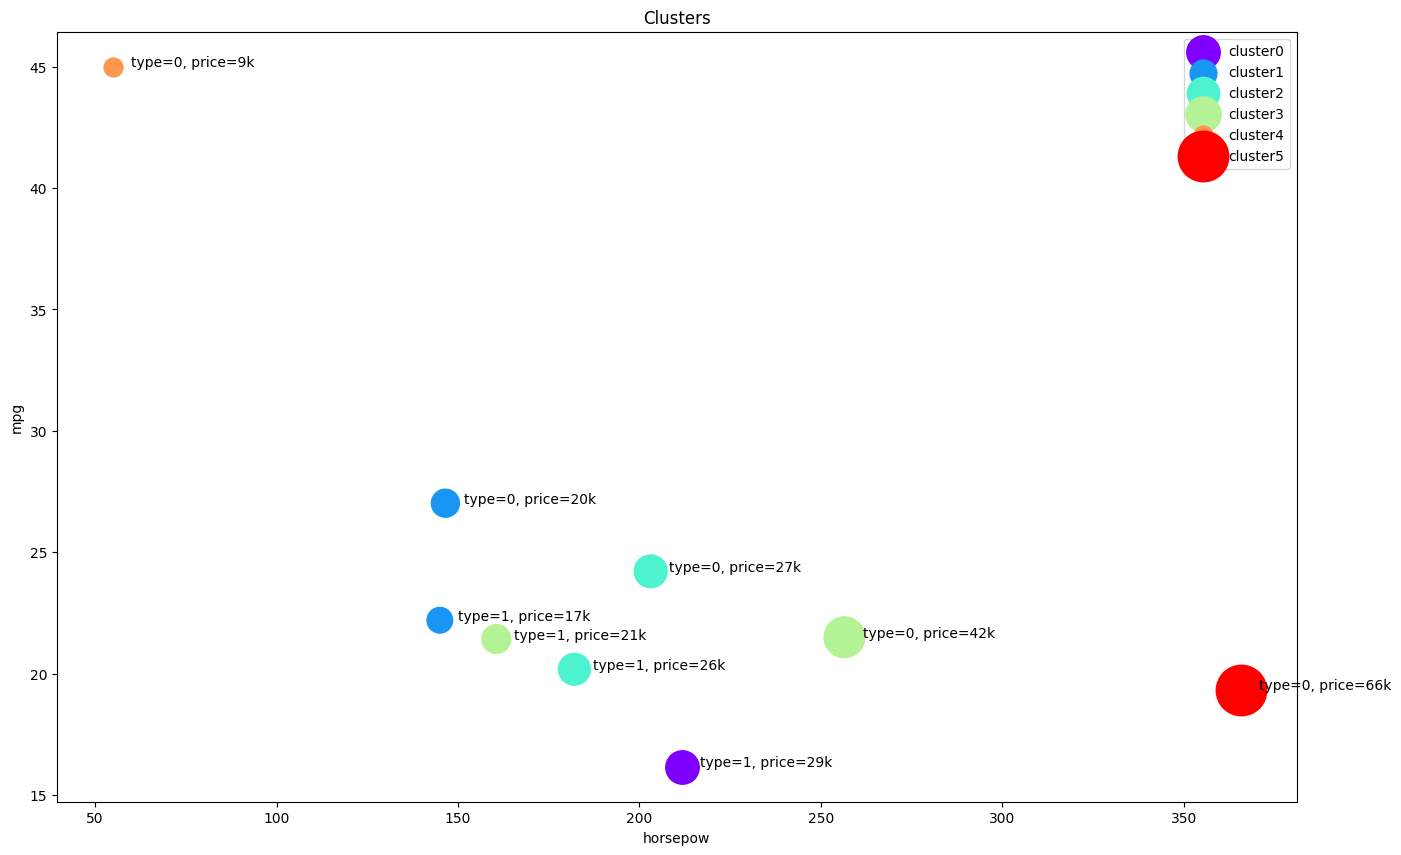

In [ ]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')
